# **A Relação do Saneamento Básico com a Pandemia do COVID-19**

por Marianna Massi :)

[O país convive com 35 milhões de brasileiros que não têm acesso a água potável e outros 100 milhões com moradias sem conexão à rede de coleta e tratamento de esgoto. Além de servir para a expansão de doenças relacionadas à veiculação hídrica, essas condições não permitem que as pessoas cumpram a higienização mínima de lavar as mãos para evitar a proliferação do novo coronavírus.](https://www.saneamentobasico.com.br/covid-19-cenario-saneamento/)

Esse projeto visa analisar a relação entre a saúde e a pandemia com o saneamento básico no Brasil.

Datasets utilizados:

*   [Casos - COVID-19](https://brasil.io/dataset/covid19/caso/)
*   [Saneamento - Censo 2010](https://datasus.saude.gov.br/saneamento-censos-1991-2000-e-2010/) 
*   [Produção Hospitalar](https://datasus.saude.gov.br/acesso-a-informacao/producao-hospitalar-sih-sus/) 

**Resumo:**

O objetivo nesse projeto é analisar o Censo de Saneamento Básico Nacional de 2010 e relacionar aos Procedimentos Hispitalares do SUS e Casos/Óbitos do COVID-19.

Hipoteses:

*   Os abastecimentos de água influenciaram o impacto do COVID-19.
*   As instalações sanitárias influenciaram o impacto do COVID-19.
*   Há relação entre os procedimentos hospitalares no ano de 2020 e os casos de COVID-19.
*   Os óbitos por COVID-19 nos estados com menores indices de saneamento básico, de acordo com o Censo de 2010, são maiores.


# Import

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

##Abastecimento de Água - DataFrame

In [3]:
fonte = "https://raw.githubusercontent.com/mariannamassi/Modulo1-bootcamp/main/Abastecimento_Agua.csv"

dados = pd.read_csv(fonte, encoding = "UTF-8",
                    skiprows=3, sep=";", skipfooter=12,
                    thousands=".", decimal=",")



dados.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """


,Unidade da Federação,Rede geral - sem informação de canalização,Poço ou nascente - sem informação de canalização,Outra forma - Poço ou nascente fora da propriedade,Outra forma - Carro-pipa,Outra forma - Água da chuva armazenada em cisterna,Outra forma - Água da chuva armazenada outra forma,"Outra forma - Rio, açude, lago ou igarapé",Outra forma - Poço ou nascente na aldeia,Outra forma - Poço ou nascente fora da aldeia,Outra forma - Outra,Total
0,11 Rondônia,175418,258708,16523,178,14,27,3517,203,-,1011,455599
1,12 Acre,90121,74883,8732,1216,62,131,12484,623,38,2355,190645
2,13 Amazonas,516260,102935,76989,273,973,6426,86134,1343,175,8121,799629
3,14 Roraima,94101,14435,1866,34,7,26,4156,647,203,369,115844
4,15 Pará,891368,684490,147533,4624,616,593,114386,893,24,14638,1859165


##Instalações Sanitárias - DataFrame

In [4]:
fonte2 = "https://raw.githubusercontent.com/mariannamassi/Modulo1-bootcamp/main/Instalacoes_Sanitarias.csv"

dados2 = pd.read_csv(fonte2, encoding = "UTF-8",
                    skiprows=3, sep=";", skipfooter=12,
                    thousands=".", decimal=",")

dados2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """


,Unidade da Federação,Rede geral de esgoto ou pluvial,Fossa séptica,Fossa rudimendar,Vala,"Rio, lago ou mar",Outro escoadouro,Não tem instalação sanitária,Total
0,11 Rondônia,27637,73113,326457,7779,3481,9892,7240,455599
1,12 Acre,46550,23123,52829,26376,4450,20537,16780,190645
2,13 Amazonas,210575,141775,273525,52452,41149,39672,40481,799629
3,14 Roraima,17660,33991,50129,1829,364,5247,6624,115844
4,15 Pará,189398,388597,893527,132099,36024,141654,77866,1859165


##Procedimentos Hospitalares do SUS - DataFrame

In [13]:
fonte3 = "https://raw.githubusercontent.com/mariannamassi/Modulo1-bootcamp/main/Procedimentos_Hospitalares.csv"

dados3 = pd.read_csv(fonte3, encoding = "UTF-8",
                    skiprows=3, sep=";", skipfooter=12,
                    thousands=".", decimal=",")

ano_2020 = ["2020/Jan","2020/Fev","2020/Mar","2020/Abr","2020/Mai", "2020/Jun", "2020/Jul","2020/Ago", "2020/Set"]
dados3["2020_Total"] = dados3[ano_2020].sum(axis=1)

dados3.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """


,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,Total,2020_Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,3593.34,-,-,-,-,-,5127.22,14807.96,20983.20,155766.04,1166389.75,2568250.29,6076265.54,8810960.21,8622939.37,7768652.42,7484245.02,9023178.03,10852613.15,8914933.78,7596727.92,2931408.07,8.201684e+07,7.200566e+07
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,22908.08,98654.36,115052.11,297687.44,694801.08,1248059.02,2244305.09,3496073.45,3253271.76,3181587.48,2596984.63,2619467.00,2707979.40,2580971.45,1804642.24,44234.08,2.700668e+07,2.228521e+07
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1521.50,78770.35,184186.67,1296404.47,4936624.45,11570029.63,16992004.85,15643731.75,15617733.72,16688195.03,19864416.98,18280203.56,17014668.00,13411098.25,4974840.99,1.565544e+08,1.384869e+08
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,33448.83,140382.22,622648.57,1749531.47,3495588.06,3268156.25,3233702.03,2396870.80,3128317.29,3369873.30,3214185.63,2724031.33,1548381.60,2.892512e+07,2.637911e+07
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,324.90,-,-,-,-,10437.56,23658.41,186174.42,788963.60,4773764.17,10452469.43,21692400.82,37703983.29,35699543.84,35290836.71,29136155.94,42129665.39,37567623.25,31928762.76,20329019.67,4598013.47,3.123118e+08,2.743836e+08


##COVID-19 - DataFrame

In [100]:
fonte5 = "/content/drive/MyDrive/caso.csv"

dados5 = pd.read_csv(fonte5)

dados5.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-20,AC,NaN,state,34246,711,249,True,881935.0,894470.0,12.0,3828.63595,0.0208
1,2020-11-19,AC,NaN,state,33976,710,248,False,881935.0,894470.0,12.0,3798.45048,0.0209
2,2020-11-18,AC,NaN,state,33725,709,247,False,881935.0,894470.0,12.0,3770.38917,0.0210
3,2020-11-17,AC,NaN,state,33475,709,246,False,881935.0,894470.0,12.0,3742.43966,0.0212
4,2020-11-16,AC,NaN,state,33295,708,245,False,881935.0,894470.0,12.0,3722.31601,0.0213


# Análises das Hipóteses

##Os abastecimentos de água influenciaram o impacto do COVID-19?

###Abastecimento de Água

Relação do abastecimento de água por estado brasileiro.

**Minas Gerais, Bahia e Pernambuco são os 3 estados mais abastecidos.**

**Roraima, Amapá e Acre são os menos abastecidos.**

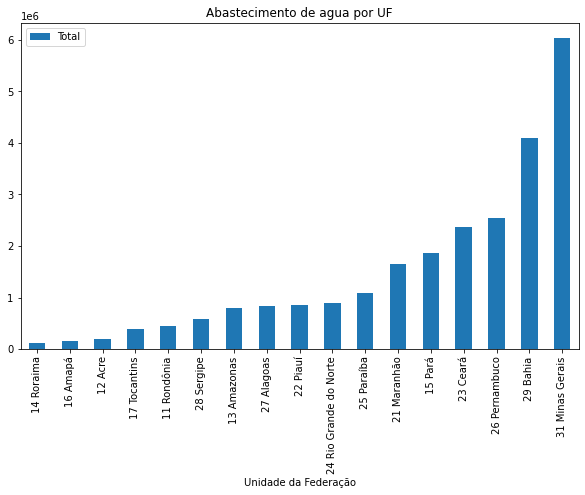

In [ ]:
dados.plot(x="Unidade da Federação", y="Total", kind="bar", figsize=(10,6))
dados.sort_values(by ='Total', inplace = True)
plt.title("Abastecimento de agua por UF")

plt.show()

A média do **tipo** de abastecimentos de água:

**Rede geral e poço/nascente são os tipos mais comuns.**

In [ ]:
media_dados = dados.mean()
media_dados

Rede geral - sem informação de canalização            1.105848e+06
Poço ou nascente - sem informação de canalização      1.728852e+05
Outra forma - Poço ou nascente fora da propriedade    8.905676e+04
Outra forma - Carro-pipa                              1.554471e+04
Outra forma - Água da chuva armazenada em cisterna    1.924371e+04
Outra forma - Água da chuva armazenada outra forma    2.691412e+03
Outra forma - Rio, açude, lago ou igarapé             4.056400e+04
Outra forma - Outra                                   1.987976e+04
Total                                                 1.466274e+06
dtype: float64

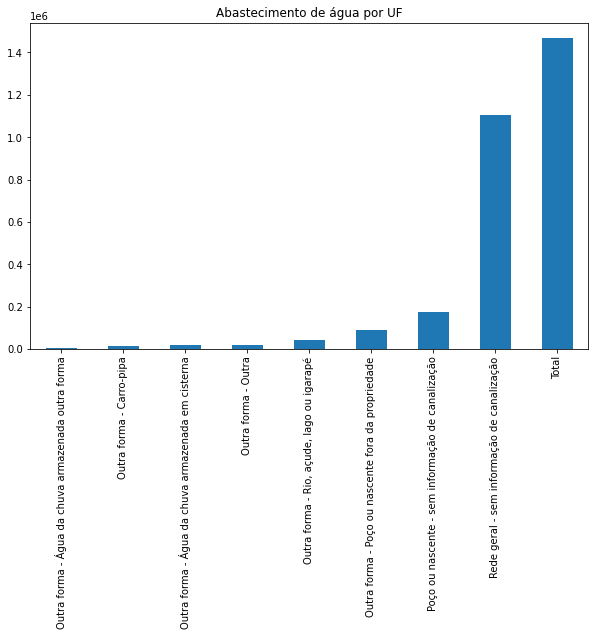

In [ ]:
media_dados.plot(kind="bar", figsize=(10,6))
media_dados.sort_values(inplace = True)
plt.title("Abastecimento de água por UF")

plt.show()

###COVID-19

In [72]:
dados5

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-20,AC,NaN,state,34246,711,249,True,881935.0,894470.0,12.0,3828.63595,0.0208
1,2020-11-19,AC,NaN,state,33976,710,248,False,881935.0,894470.0,12.0,3798.45048,0.0209
2,2020-11-18,AC,NaN,state,33725,709,247,False,881935.0,894470.0,12.0,3770.38917,0.0210
3,2020-11-17,AC,NaN,state,33475,709,246,False,881935.0,894470.0,12.0,3742.43966,0.0212
4,2020-11-16,AC,NaN,state,33295,708,245,False,881935.0,894470.0,12.0,3722.31601,0.0213
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013637,2020-06-23,SP,Óleo,city,1,0,5,False,2496.0,2471.0,3533809.0,40.46945,0.0000
1013638,2020-06-22,SP,Óleo,city,1,0,4,False,2496.0,2471.0,3533809.0,40.46945,0.0000
1013639,2020-06-21,SP,Óleo,city,1,0,3,False,2496.0,2471.0,3533809.0,40.46945,0.0000
1013640,2020-06-20,SP,Óleo,city,1,0,2,False,2496.0,2471.0,3533809.0,40.46945,0.0000


Relação dos casos confirmados por estado brasileiro.

**São Paulo, Minas Gerais e Bahia são os 3 estados mais afetados pelo vírus.**

**Enquanto, Acre, Amapá e Roraima são os menos afetados.**

In [ ]:
dados_para_plot = dados5.query("place_type == 'state' & is_last == True")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


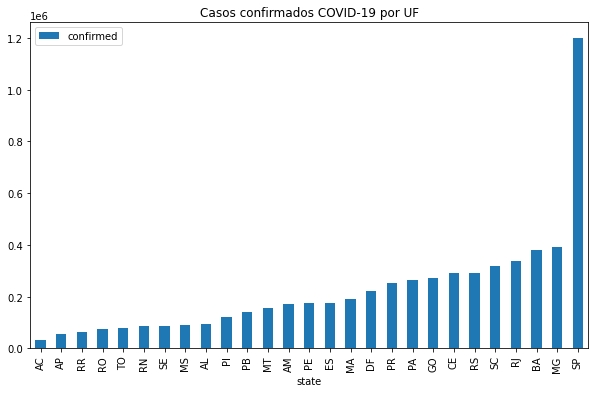

In [70]:
dados_para_plot.plot(x="state", y="confirmed", kind="bar", figsize=(10,6))
dados_para_plot.sort_values(by = "confirmed", inplace = True)
plt.title("Casos confirmados COVID-19 por UF")

plt.show()

A população estimada de cada estado.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


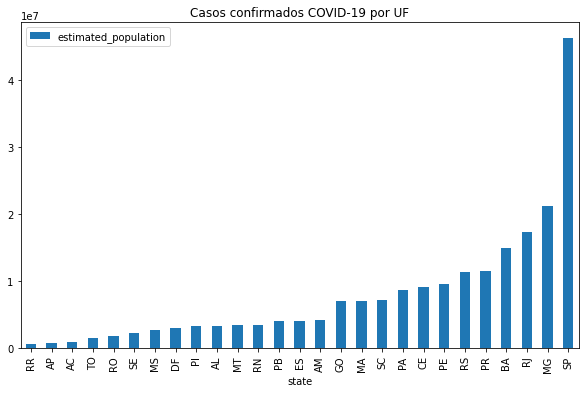

In [84]:
dados_para_plot.plot(x="state", y="estimated_population", kind="bar", figsize=(10,6))
dados_para_plot.sort_values(by = "estimated_population", inplace = True)
plt.title("Casos confirmados COVID-19 por UF")

plt.show()

A proporção de casos confirmados por 100 mil habitantes de cada estado.

**Roraima, Destrito Federal e Amapá são os estados com a maior proporção de casos.**

**Pernambuco, Minas Gerais e Rio de Janeiro são com a menor proporção.**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


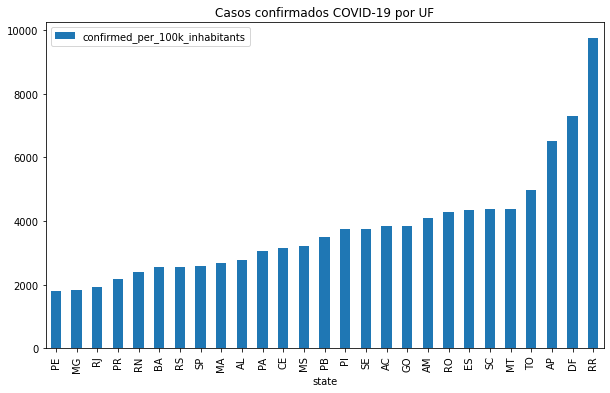

In [89]:
dados_para_plot.plot(x="state", y="confirmed_per_100k_inhabitants", kind="bar", figsize=(10,6))
dados_para_plot.sort_values(by = "confirmed_per_100k_inhabitants", inplace = True)
plt.title("Casos confirmados COVID-19 por UF")

plt.show()

As confirmações de casos aumentaram a cada mês.

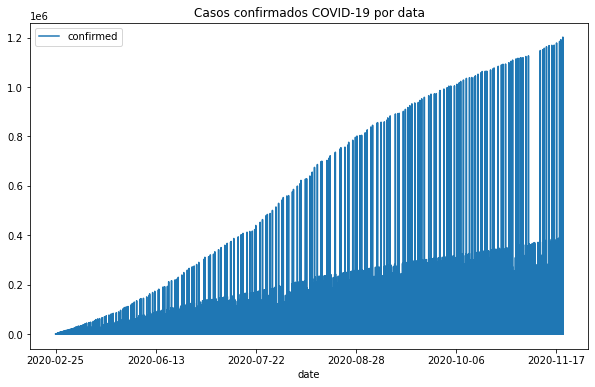

In [81]:
dados5.plot(x="date", y="confirmed", kind="line", figsize=(10,6))
dados5.sort_values(by = "date", inplace = True)
plt.title("Casos confirmados COVID-19 por data")

plt.show()

Relação de óbitos de infectados com COVID-19 por estado brasileiro.

**São Paulo, Rio de Janeiro e Minas Gerais são os com maiores números de óbitos.**

**Enquanto, Acre, Amapá e Roraima são os menores números.**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


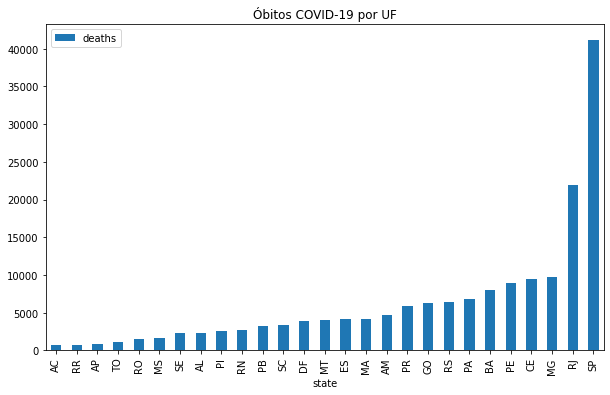

In [ ]:
dados_para_plot.plot(x="state", y="deaths", kind="bar", figsize=(10,6))
dados_para_plot.sort_values(by = "deaths", inplace = True)
plt.title("Óbitos COVID-19 por UF")

plt.show()

O número de óbitos aumentou a cada mês.

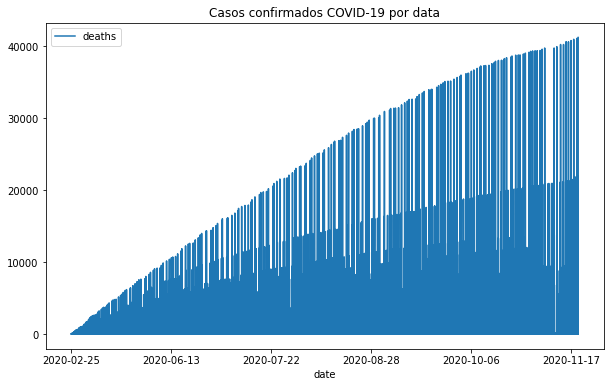

In [82]:
dados5.plot(x="date", y="deaths", kind="line", figsize=(10,6))
dados5.sort_values(by = "date", inplace = True)
plt.title("Casos confirmados COVID-19 por data")

plt.show()

A média dos dados da pandemia no Brasil.

In [ ]:
media_covid = dados_para_plot.mean()

media_covid

city                                       NaN
confirmed                         2.230971e+05
deaths                            6.249037e+03
order_for_place                   2.492963e+02
is_last                           1.000000e+00
estimated_population_2019         7.783227e+06
estimated_population              7.842803e+06
city_ibge_code                    2.911111e+01
confirmed_per_100k_inhabitants    3.759257e+03
death_rate                        2.502963e-02
dtype: float64

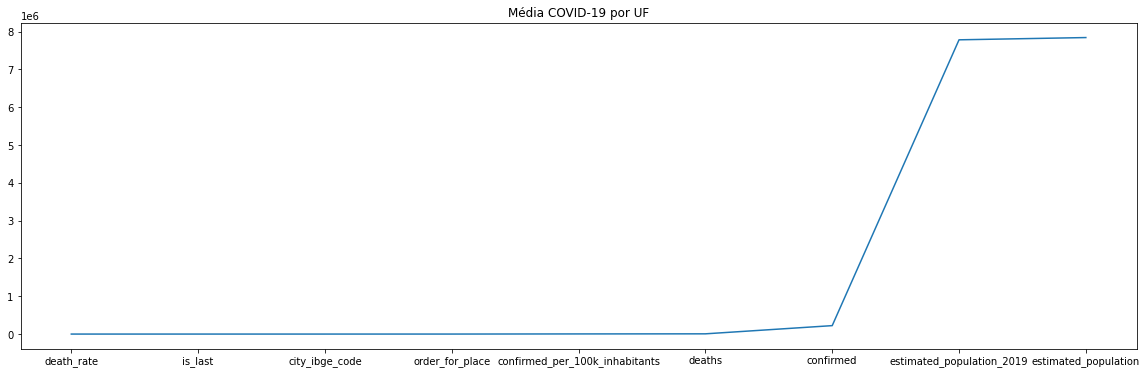

In [ ]:
media_covid.plot(kind="line", figsize=(20,6))
media_covid.sort_values(inplace = True)
plt.title("Média COVID-19 por UF")

plt.show()

###**Conclusão**
Uma forma de prevenção da infecção do vírus é por meio da limpeza com água e sabão. Roraima e Amapá foram os estados menos abastecidos com água, de acordo com o Censo de 2010, e também os mais afetados pela pandemia.

*   Ou seja, há uma influencia direta do abastecimento de água nos estados e o impacto do COVID-19.



##Há relação entre os procedimentos hospitalares no ano de 2020 e os casos de COVID-19?

###Procedimentos Hospitalares

Relação dos procedimentos hospitalares por estado.

**São Paulo, Minas Gerais e Paraná são os com maiores números.**

**Amapá, Acre e Roraima são os com menores números.**

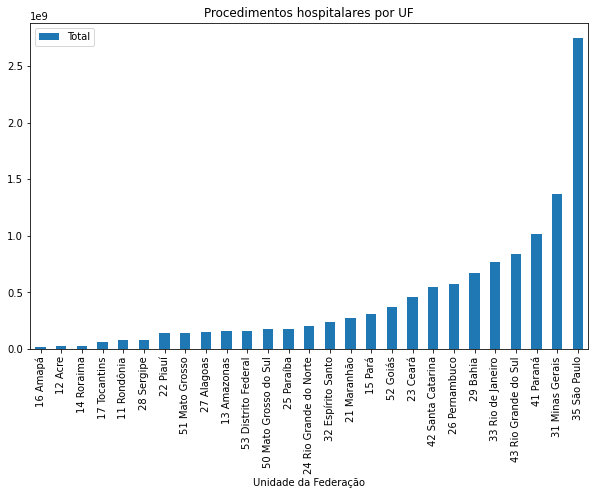

In [57]:
dados3.plot(x="Unidade da Federação", y="Total", kind="bar", figsize=(10,6))
dados3.sort_values(by ='Total', inplace = True)
plt.title("Procedimentos hospitalares por UF")

plt.show()

Relação dos procedimentos hospitalares por estado em 2020.

**São Paulo, Minas Gerais e Paraná são os com maiores números.**

**Amapá, Acre e Roraima são os com menores números.**

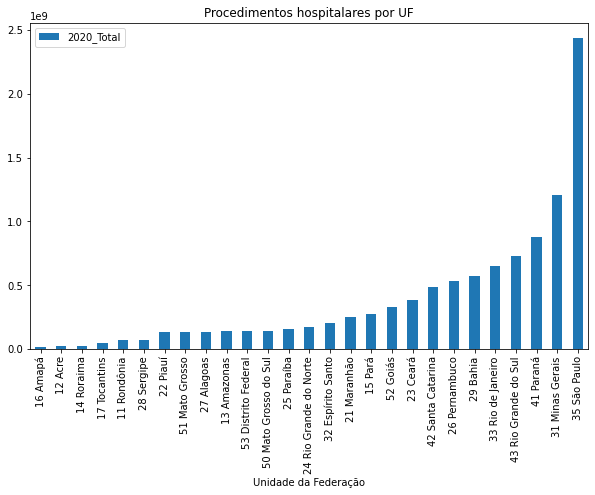

In [15]:
dados3.plot(x="Unidade da Federação", y="2020_Total", kind="bar", figsize=(10,6))
dados3.sort_values(by ='Total', inplace = True)
plt.title("Procedimentos hospitalares por UF")

plt.show()

In [90]:
#média dos procedimentos hospitalares em 2020.
dados3["2020_Total"].mean()

383079875.88

A média dos procedimentos hospitalares desde setembro/2019.

**Junho de 2020 foi o mês com maior número, enquanto setembro de 2019 foi o com menor.**

In [66]:
dados3.mean()

2019/Set      1.950940e+06
2019/Out      6.514485e+06
2019/Nov      1.324080e+07
2019/Dez      2.817429e+07
2020/Jan      4.940251e+07
2020/Fev      4.512836e+07
2020/Mar      4.535113e+07
2020/Abr      4.034716e+07
2020/Mai      4.801272e+07
2020/Jun      4.950073e+07
2020/Jul      4.931136e+07
2020/Ago      3.840829e+07
2020/Set      1.761762e+07
Total         4.375917e+08
2020_Total    3.830799e+08
dtype: float64

In [19]:
media_dados3 = dados3.mean()

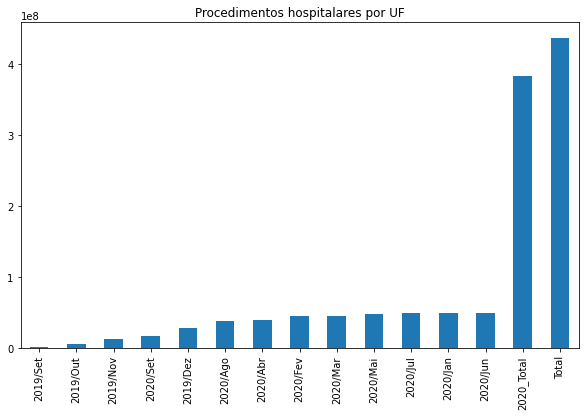

In [94]:
media_dados3.plot(kind="bar", figsize=(10,6))
plt.title("Procedimentos hospitalares por UF")

plt.show()

###COVID-19
Dados repetidos

Relação dos casos confirmados por estado brasileiro.

**São Paulo, Minas Gerais e Bahia são os 3 estados mais afetados pelo vírus.**

**Enquanto, Acre, Amapá e Roraima são os menos afetados.**

In [ ]:
dados_para_plot = dados5.query("place_type == 'state' & is_last == True")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


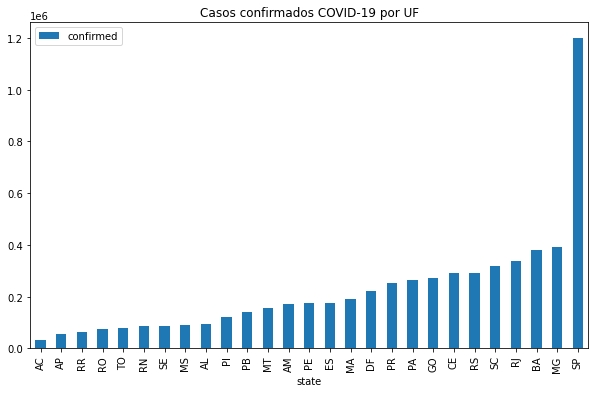

In [ ]:
dados_para_plot.plot(x="state", y="confirmed", kind="bar", figsize=(10,6))
dados_para_plot.sort_values(by = "confirmed", inplace = True)
plt.title("Casos confirmados COVID-19 por UF")

plt.show()

A população estimada de cada estado.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


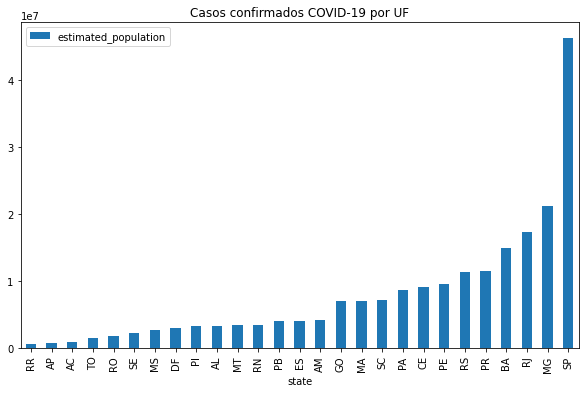

In [ ]:
dados_para_plot.plot(x="state", y="estimated_population", kind="bar", figsize=(10,6))
dados_para_plot.sort_values(by = "estimated_population", inplace = True)
plt.title("Casos confirmados COVID-19 por UF")

plt.show()

A proporção de casos confirmados por 100 mil habitantes de cada estado.

**Roraima, Destrito Federal e Amapá são os estados com a maior proporção de casos.**

**Pernambuco, Minas Gerais e Rio de Janeiro são com a menor proporção.**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


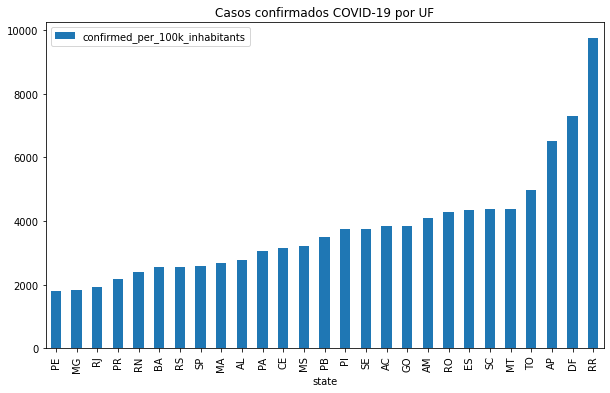

In [ ]:
dados_para_plot.plot(x="state", y="confirmed_per_100k_inhabitants", kind="bar", figsize=(10,6))
dados_para_plot.sort_values(by = "confirmed_per_100k_inhabitants", inplace = True)
plt.title("Casos confirmados COVID-19 por UF")

plt.show()

As confirmações de casos aumentaram a cada mês.

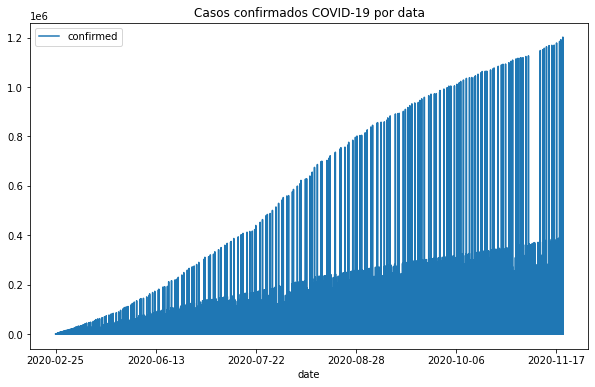

In [ ]:
dados5.plot(x="date", y="confirmed", kind="line", figsize=(10,6))
dados5.sort_values(by = "date", inplace = True)
plt.title("Casos confirmados COVID-19 por data")

plt.show()

Relação de óbitos de infectados com COVID-19 por estado brasileiro.

**São Paulo, Rio de Janeiro e Minas Gerais são os com maiores números de óbitos.**

**Enquanto, Acre, Amapá e Roraima são os menores números.**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


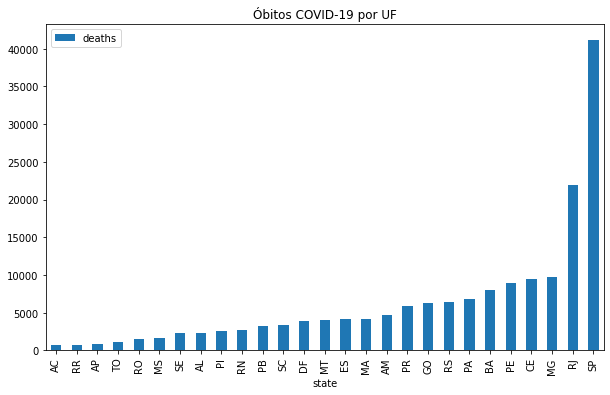

In [ ]:
dados_para_plot.plot(x="state", y="deaths", kind="bar", figsize=(10,6))
dados_para_plot.sort_values(by = "deaths", inplace = True)
plt.title("Óbitos COVID-19 por UF")

plt.show()

O número de óbitos aumentou a cada mês.

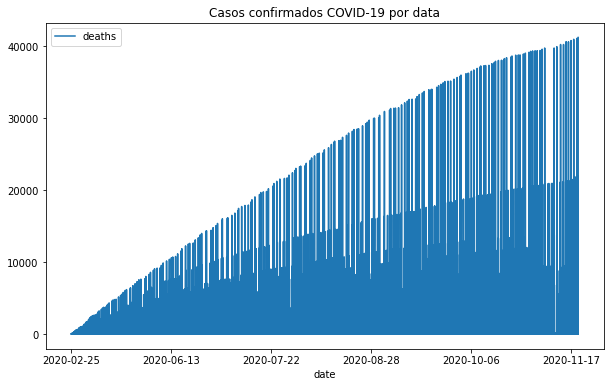

In [ ]:
dados5.plot(x="date", y="deaths", kind="line", figsize=(10,6))
dados5.sort_values(by = "date", inplace = True)
plt.title("Casos confirmados COVID-19 por data")

plt.show()

A média dos dados da pandemia no Brasil.

In [ ]:
media_covid = dados_para_plot.mean()

media_covid

city                                       NaN
confirmed                         2.230971e+05
deaths                            6.249037e+03
order_for_place                   2.492963e+02
is_last                           1.000000e+00
estimated_population_2019         7.783227e+06
estimated_population              7.842803e+06
city_ibge_code                    2.911111e+01
confirmed_per_100k_inhabitants    3.759257e+03
death_rate                        2.502963e-02
dtype: float64

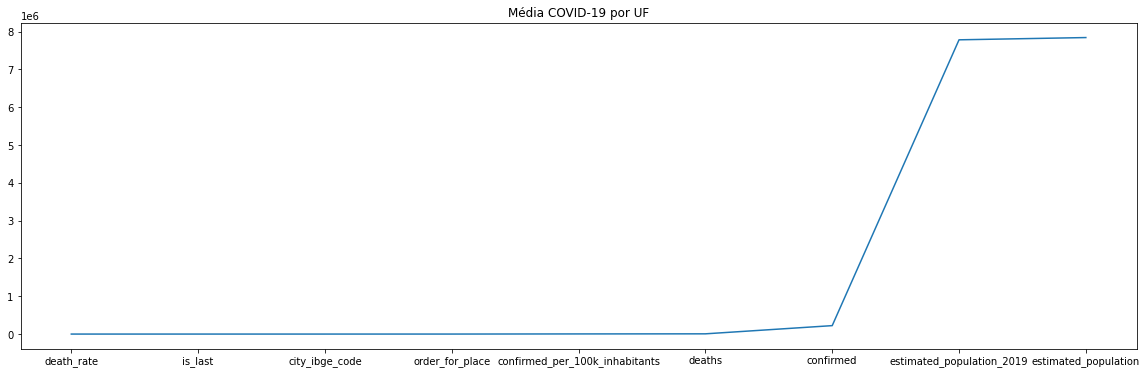

In [ ]:
media_covid.plot(kind="line", figsize=(20,6))
media_covid.sort_values(inplace = True)
plt.title("Média COVID-19 por UF")

plt.show()

###**Conclusão**
Os leitos hospitalares terem tido um grande número de infectados pelo vírus, supõe-se que haverá um impacto nos procedimentos no ano de 2020.
*   Entretanto, de acordo com os dados, não há relação dos procedimentos hospitalares e os casos/óbitos de COVID-19.

##As instalações sanitárias influenciaram o impacto do COVID-19?

###Instalações Sanitárias

Relação das instalações sanitárias por estado brasileiro.

**Minas Gerais, Bahia e Pernambuco são os 3 estados com maior número.**

**Roraima, Amapá e Acre são os menor número.**

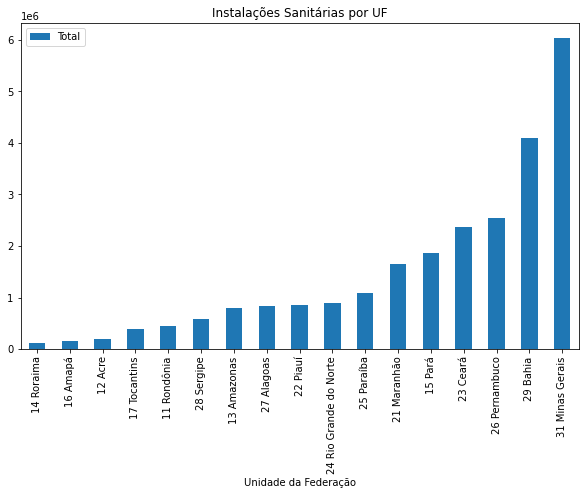

In [22]:
dados2.plot(x="Unidade da Federação", y="Total", kind="bar", figsize=(10,6))
dados2.sort_values(by ='Total', inplace = True)
plt.title("Instalações Sanitárias por UF")

plt.show()

Relação dos tipos de instalações sanitárias.

**Rede geral de esgoto ou pluvial, fossa rudimentar e fossa septica são os tipos com maiores instalações.**

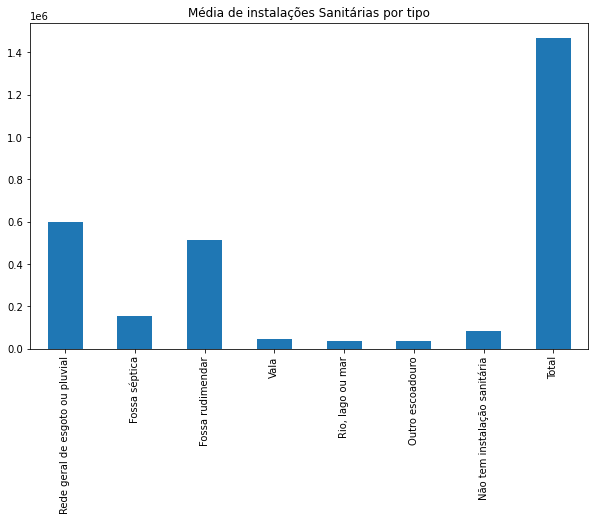

In [97]:
media_dados2 = dados2.mean()

media_dados2.plot(kind="bar", figsize=(10,6))
media_dados2.sort_values(inplace = True)
plt.title("Média de instalações Sanitárias por tipo")

plt.show()

###COVID-19
Dados repetidos

Relação dos casos confirmados por estado brasileiro.

**São Paulo, Minas Gerais e Bahia são os 3 estados mais afetados pelo vírus.**

**Enquanto, Acre, Amapá e Roraima são os menos afetados.**

In [ ]:
dados_para_plot = dados5.query("place_type == 'state' & is_last == True")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


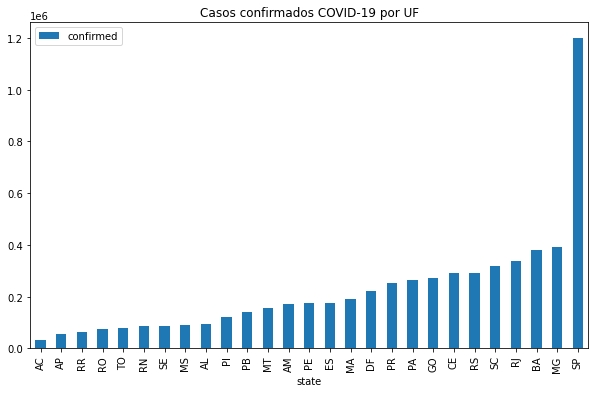

In [ ]:
dados_para_plot.plot(x="state", y="confirmed", kind="bar", figsize=(10,6))
dados_para_plot.sort_values(by = "confirmed", inplace = True)
plt.title("Casos confirmados COVID-19 por UF")

plt.show()

A população estimada de cada estado.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


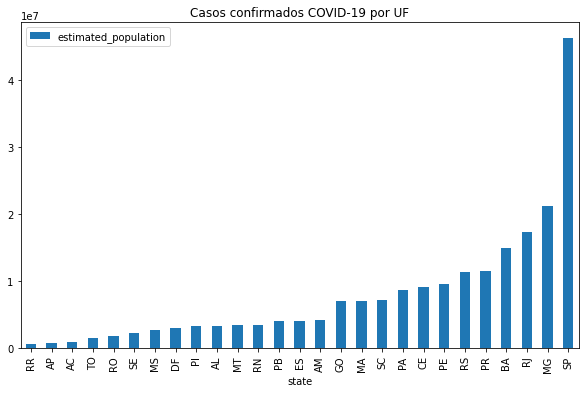

In [ ]:
dados_para_plot.plot(x="state", y="estimated_population", kind="bar", figsize=(10,6))
dados_para_plot.sort_values(by = "estimated_population", inplace = True)
plt.title("Casos confirmados COVID-19 por UF")

plt.show()

A proporção de casos confirmados por 100 mil habitantes de cada estado.

**Roraima, Destrito Federal e Amapá são os estados com a maior proporção de casos.**

**Pernambuco, Minas Gerais e Rio de Janeiro são com a menor proporção.**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


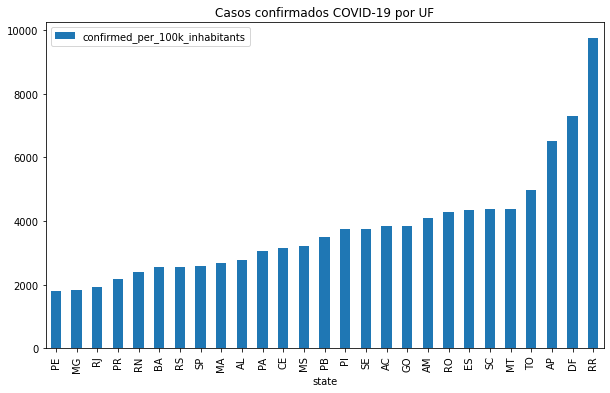

In [ ]:
dados_para_plot.plot(x="state", y="confirmed_per_100k_inhabitants", kind="bar", figsize=(10,6))
dados_para_plot.sort_values(by = "confirmed_per_100k_inhabitants", inplace = True)
plt.title("Casos confirmados COVID-19 por UF")

plt.show()

As confirmações de casos aumentaram a cada mês.

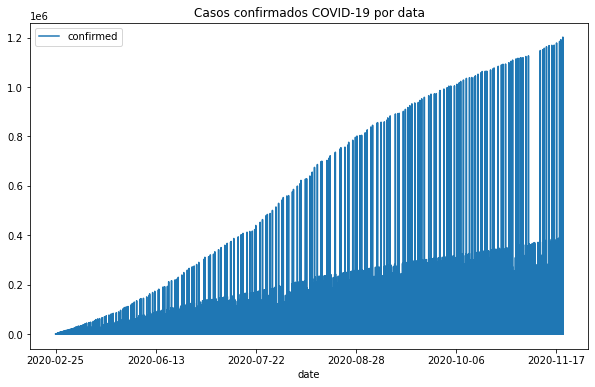

In [ ]:
dados5.plot(x="date", y="confirmed", kind="line", figsize=(10,6))
dados5.sort_values(by = "date", inplace = True)
plt.title("Casos confirmados COVID-19 por data")

plt.show()

Relação de óbitos de infectados com COVID-19 por estado brasileiro.

**São Paulo, Rio de Janeiro e Minas Gerais são os com maiores números de óbitos.**

**Enquanto, Acre, Amapá e Roraima são os menores números.**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


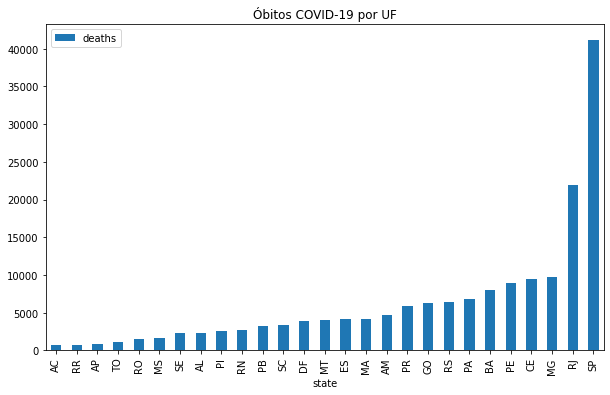

In [ ]:
dados_para_plot.plot(x="state", y="deaths", kind="bar", figsize=(10,6))
dados_para_plot.sort_values(by = "deaths", inplace = True)
plt.title("Óbitos COVID-19 por UF")

plt.show()

O número de óbitos aumentou a cada mês.

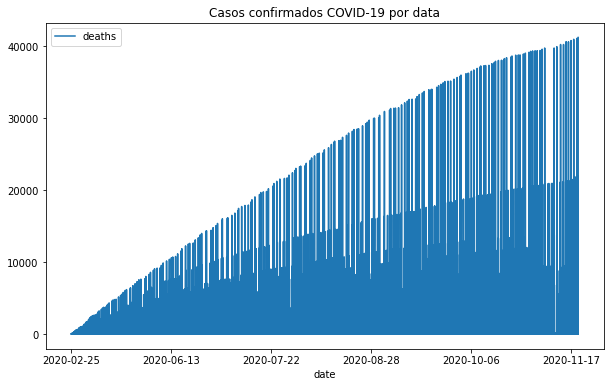

In [ ]:
dados5.plot(x="date", y="deaths", kind="line", figsize=(10,6))
dados5.sort_values(by = "date", inplace = True)
plt.title("Casos confirmados COVID-19 por data")

plt.show()

A média dos dados da pandemia no Brasil.

In [ ]:
media_covid = dados_para_plot.mean()

media_covid

city                                       NaN
confirmed                         2.230971e+05
deaths                            6.249037e+03
order_for_place                   2.492963e+02
is_last                           1.000000e+00
estimated_population_2019         7.783227e+06
estimated_population              7.842803e+06
city_ibge_code                    2.911111e+01
confirmed_per_100k_inhabitants    3.759257e+03
death_rate                        2.502963e-02
dtype: float64

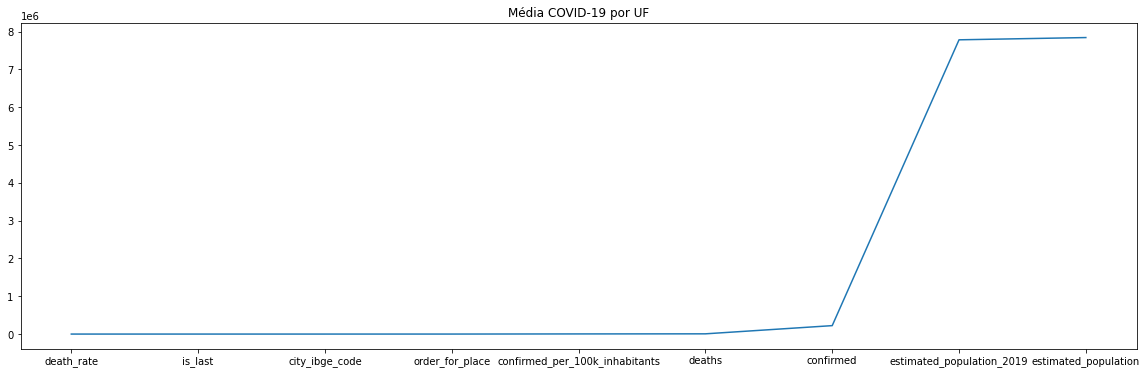

In [ ]:
media_covid.plot(kind="line", figsize=(20,6))
media_covid.sort_values(inplace = True)
plt.title("Média COVID-19 por UF")

plt.show()

###**Conclusão**
Assim como o abastecimento de água, supõe-se que haverá uma relação com o impacto da pandemia nos estados. Roraima e Amapá foram os estados com menos instalações sanitárias, de acordo com o Censo de 2010, e também os mais afetados pela pandemia.

*   **Ou seja, há uma influencia direta da instalação sanitária nos estados e o impacto do COVID-19.**

##As taxas de óbitos por COVID-19 nos estados com menores índices de saneamento básico, de acordo com o Censo de 2010, são maiores?

###Saneamento básico

**Abastecimento de Água**

Relação do abastecimento de água por estado brasileiro.

**Minas Gerais, Bahia e Pernambuco são os 3 estados mais abastecidos.**

**Roraima, Amapá e Acre são os menos abastecidos.**

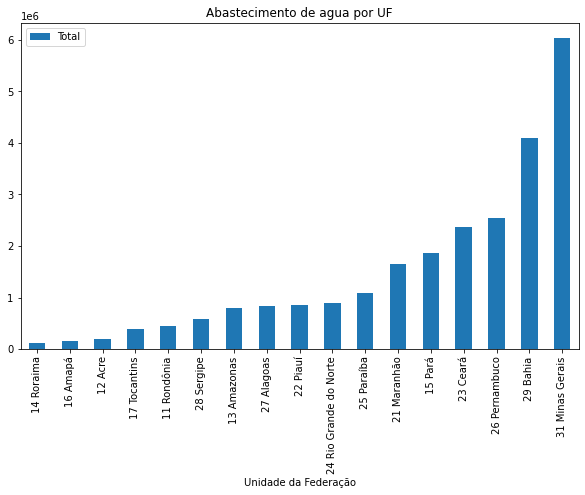

In [ ]:
dados.plot(x="Unidade da Federação", y="Total", kind="bar", figsize=(10,6))
dados.sort_values(by ='Total', inplace = True)
plt.title("Abastecimento de agua por UF")

plt.show()

**Instalação Sanitário**

Relação das instalações sanitárias por estado brasileiro.

**Minas Gerais, Bahia e Pernambuco são os 3 estados com maior número.**

**Roraima, Amapá e Acre são os menor número.**

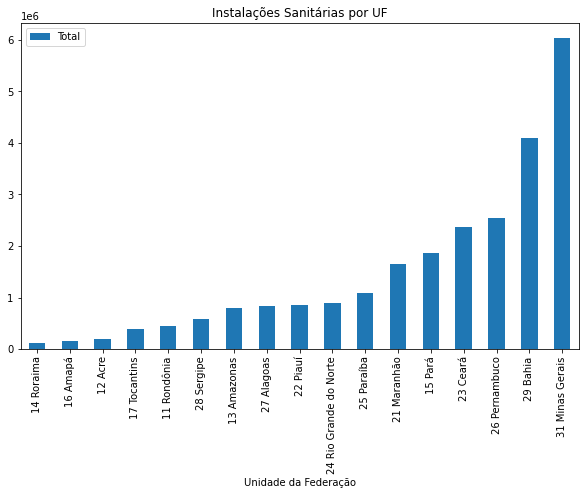

In [ ]:
dados2.plot(x="Unidade da Federação", y="Total", kind="bar", figsize=(10,6))
dados2.sort_values(by ='Total', inplace = True)
plt.title("Instalações Sanitárias por UF")

plt.show()

###Óbitos por COVID-19

Relação de óbitos de infectados com COVID-19 por estado brasileiro.

**São Paulo, Rio de Janeiro e Minas Gerais são os com maiores números de óbitos.**

**Enquanto, Acre, Amapá e Roraima são os menores números.**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


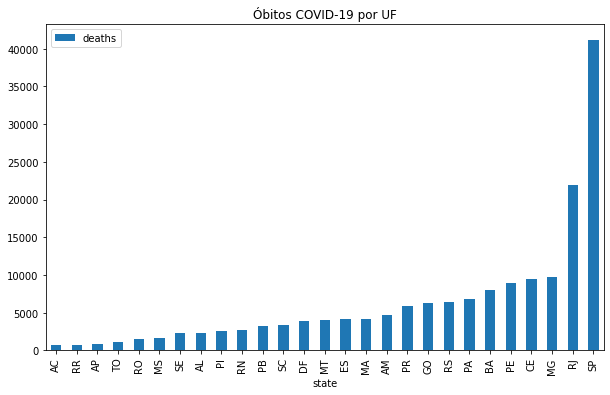

In [ ]:
dados_para_plot.plot(x="state", y="deaths", kind="bar", figsize=(10,6))
dados_para_plot.sort_values(by = "deaths", inplace = True)
plt.title("Óbitos COVID-19 por UF")

plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


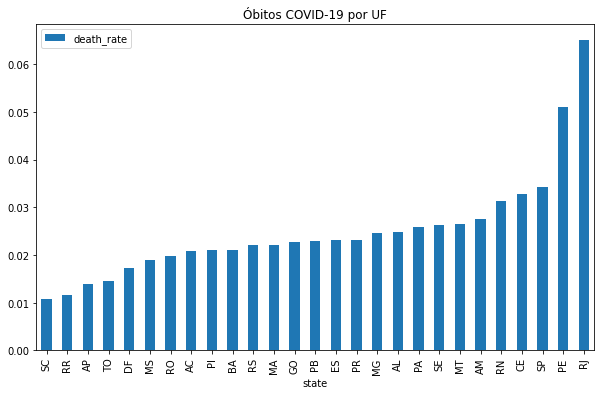

In [99]:
dados_para_plot.plot(x="state", y="death_rate", kind="bar", figsize=(10,6))
dados_para_plot.sort_values(by = "death_rate", inplace = True)
plt.title("Óbitos COVID-19 por UF")

plt.show()

O número de óbitos aumentou a cada mês.

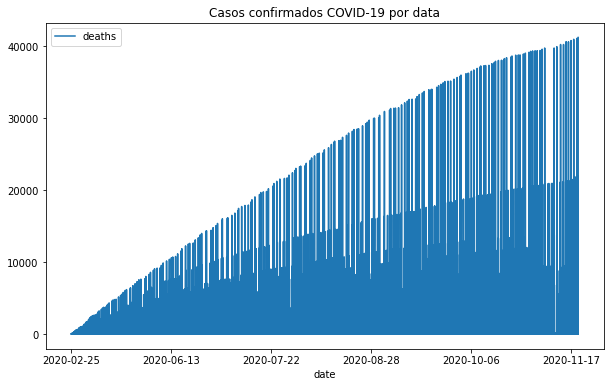

In [ ]:
dados5.plot(x="date", y="deaths", kind="line", figsize=(10,6))
dados5.sort_values(by = "date", inplace = True)
plt.title("Casos confirmados COVID-19 por data")

plt.show()

###**Conclusão**
Supõe-se que haverá uma relação com o impacto da pandemia nos estados. Roraima e Amapá foram os estados com menores índices de saneamento básico, de acordo com o Censo de 2010, porém foram os com a menor taxa de óbito na pandemia.

*   **Ou seja, não necessariamente há uma influência direta do saneamento básico nos estados com os óbitos oriundos do COVID-19.**

# Conclusão Final

É preciso ter consciência da realidade do país, [hoje mais de 17 milhões de domicílios brasileiros não têm disponibilidade diária de água. Em três estados, a falta de água atingia mais de 40% dos domicílios: Rio Grande do Norte (40,2%), Acre (60,3%) e Pernambuco (61,4%).](https://www1.folha.uol.com.br/cotidiano/2019/05/dez-estados-do-pais-tem-piora-no-acesso-a-rede-de-esgoto.shtml#:~:text=A%20pesquisa%20tamb%C3%A9m%20mostra%20que,Pernambuco%20(61%2C4%25).)

Como foi demonstrado na análise, o saneamento dos estados mais afetados pela pandemia são os mais precários do Brasil pois é um fator extremamente importante para ter uma população saudável, principalmente durante uma pandemia.

[Somente com o avanço na infraestrutura de abastecimento de água e esgotamento sanitário vamos contribuir para o desenvolvimento socioeconômico de milhares de brasileiros e reduzir drasticamente a propagação de muitas doenças.](https://www.saneamentobasico.com.br/covid-19-cenario-saneamento/)